# t-SNE: Seeing data in high dimension

In this notebook an algorithm called t-SNE (t-Stochastic Neighbor Embedding) will be covered. All of its details will be explained and there will be some very cools examples. 

-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline

In [2]:
def plot_embedding(X, y, title=None):
    """funcao que realiza o plot de X, obtido pelo t-SNE
    Parametros
    ----------
    Inputs:
        X: vetores para plotar
        title (None): titulo opcional para o grafico
    Return:
        None
    """
    
    x_min, x_max = np.min(X, 0) - 1, np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,10))
    ax = plt.subplot(111)
    colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    for i in range(0, 10):
        ax.scatter(X[y == i, 0], X[y == i, 1], c = colors[i], label = str(i))
    ax.legend()
    if title is not None:
        ax.set_title(title)

In [3]:
train = pd.read_csv('./data/MNIST/mnist_train.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = train.iloc[:,0].values
X = train.drop(0, axis=1)

print("Shape of input matrix: {}".format(X.shape))
print("Shape of labels: {}".format(y.shape))

Shape of input matrix: (60000, 784)
Shape of labels: (60000,)


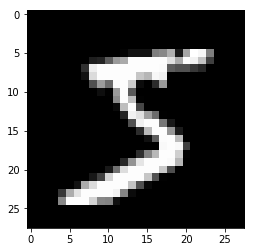

In [5]:
pixels = X.iloc[0,:].values
pixels = pixels.reshape((28, 28))

plt.imshow(pixels, cmap='gray')
plt.show()

In [6]:
X = StandardScaler().fit_transform(X.values)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [12]:
%time X_reduced = PCA(n_components = 2, random_state = 42).fit_transform(X)

CPU times: user 4.22 s, sys: 3.78 s, total: 8 s
Wall time: 3.36 s


In [13]:
print(X_reduced.shape)

(60000, 2)


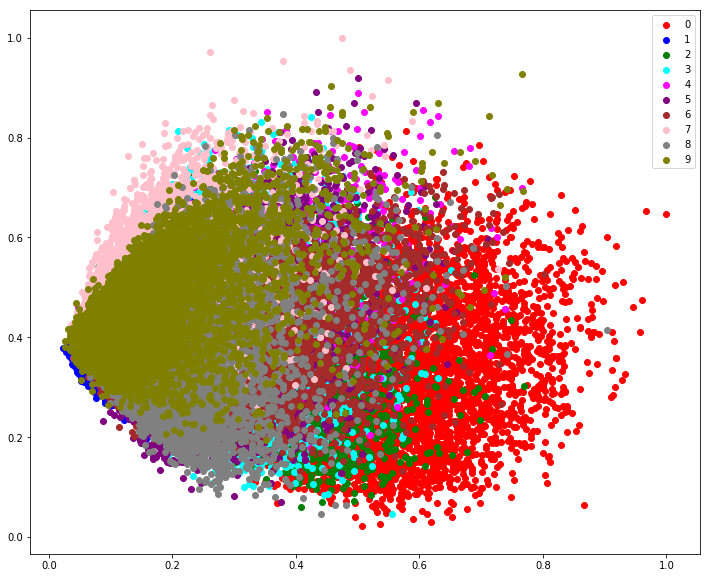

In [14]:
plot_embedding(X_reduced, y, "PCA of the all the digits")

In [8]:
%time X_pre_tsne = PCA(n_components = 100, random_state = 42).fit_transform(X)

CPU times: user 16.8 s, sys: 4.59 s, total: 21.4 s
Wall time: 7.09 s


In [9]:
tsne = TSNE(n_components = 2, perplexity = 50, random_state = 42)

In [10]:
%time X_emb = tsne.fit_transform(X_pre_tsne[:10000,:])

CPU times: user 3min 38s, sys: 44 s, total: 4min 22s
Wall time: 5min 40s


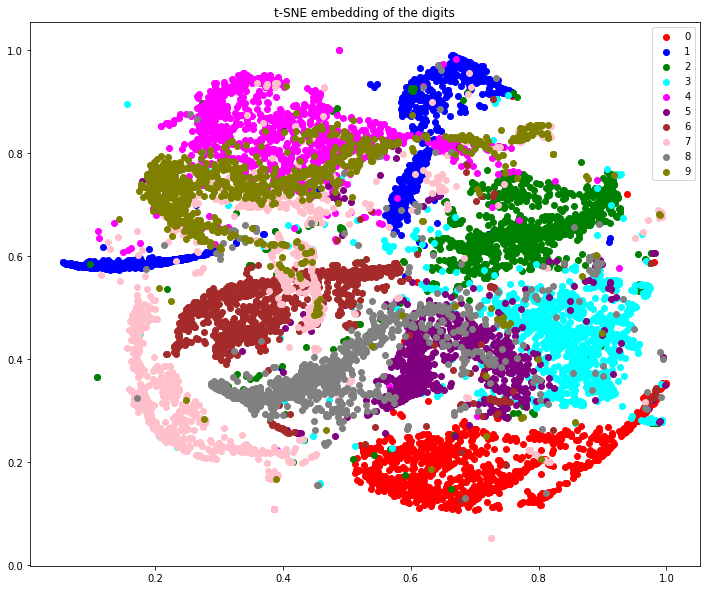

In [11]:
plot_embedding(X_emb, y[:10000], "t-SNE embedding of the digits")